<h3>Reading the dataset into a dataframe and explore</h3>

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("datafile.csv", encoding = "latin-1")
df.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


<h3>Cleaning the data</h3>

In [2]:
df.drop(df.columns[[2, 3, 4]], axis = 1, inplace = True)

df = df.rename(columns={"v1": "Category", "v2": "Message"})
df["Message"] = df["Message"].str.lower().str.replace('[^\w\s]','').str.replace('\d+', '')
clean = df
clean

<ipython-input-2-077dfe1883e6>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Message"] = df["Message"].str.lower().str.replace('[^\w\s]','').str.replace('\d+', '')


,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,spam,this is the nd time we have tried contact u u...
5568,ham,will ì_ b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


<h3>Splitting the Data</h3>

In [4]:
a = np.split(df, 4)
sample_explore = pd.concat([a[0], a[1], a[2]])
sample_test = a[3]
sample_explore

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
4174,ham,how are you doing hows the queen are you going...
4175,ham,hes in lag thats just the sad part but we keep...
4176,ham,ok lor then we go tog lor
4177,ham,two teams waiting for some players


<h3>Creating a Word Frequency DataFrame</h3>

In [7]:
spam_messages = sample_explore.loc[(sample_explore['Category'] == 'spam')]
spam_freq = spam_messages['Message'].str.split(expand=True).stack().value_counts()

spam_df = pd.DataFrame(data = spam_freq, columns=["#Spam"])


ham_messages = sample_explore.loc[(sample_explore['Category'] == 'ham')]
ham_freq = ham_messages['Message'].str.split(expand=True).stack().value_counts()

ham_df = pd.DataFrame(data = ham_freq, columns=["#Ham"])
            
test_df = pd.concat([ham_df, spam_df], axis=1)
test_df = test_df.reset_index(drop=False)
test_df = test_df.rename(columns={'index': 'Word'})
test_df['#Ham'] = test_df['#Ham'].fillna(0).astype(int)
test_df['#Spam'] = test_df['#Spam'].fillna(0).astype(int)
test_df = test_df.reindex(columns=['Word','#Spam', '#Ham'])



<h3>Visualising the Data</h3>
Representation of the most frequent words in spam messages

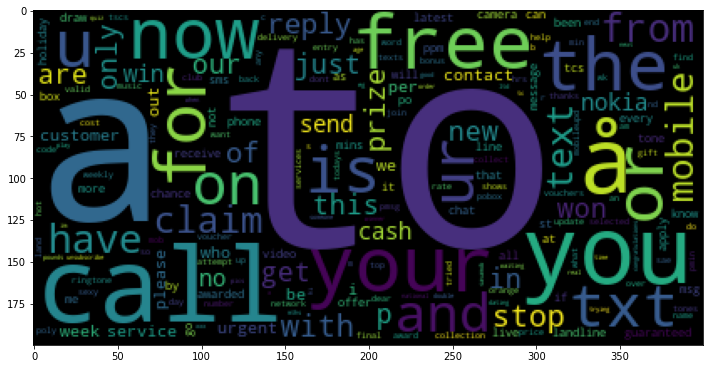

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

freq = dict(zip(test_df['Word'], test_df['#Spam']))

spam_cloud = WordCloud().generate_from_frequencies(freq)
plt.figure(figsize=(12,8))
plt.imshow(spam_cloud)

<h3>Calculating $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$</h3>

In [10]:
k= 0.5 # k is needed so the probability is never 0
word_prob = test_df.rename(columns={'#Spam': 'P(E|S)', '#Ham': 'P(E|¬S)'})
word_prob['P(E|S)'] = word_prob['P(E|S)'].apply(lambda x: (x + k)/(len(spam_messages) + 2 * k))
word_prob['P(E|¬S)'] = word_prob['P(E|¬S)'].apply(lambda x: (x + k)/(len(ham_messages) + 2 * k))
word_prob

,Word,P(E|S),P(E|¬S)
0,i,0.069788,0.452697
1,you,0.377208,0.392393
2,to,0.935512,0.321300
3,the,0.271201,0.232227
4,a,0.500883,0.221715
...,...,...,...
7363,logosmusicnews,0.002650,0.000138
7364,exp,0.002650,0.000138
7365,ukp,0.002650,0.000138
7366,mbp,0.002650,0.000138


<h3>Checking the 'spamliness' of a single word</h3>

In [14]:
def check_single(word, prior=0.4):
    
    #print(word_prob['Word'].str.contains(word)==0)
    
    if word not in word_prob['Word'].tolist():
        return "Word not in data"
            
    word_spamliness = word_prob.loc[(word_prob['Word'] == word)]

    pes = word_spamliness.iloc[0]['P(E|S)']
    pens = word_spamliness.iloc[0]['P(E|¬S)']

    post = (pes * prior)/(pes * prior + pens * (1 - prior))
    
    print("Word = ['" + str(word) + "']")
    print('P(E|S) = [' + str(pes) + ']')
    print('P(E|¬S) = [' + str(pens) + ']')
    print('P(S|E) = [' + str(post) + ']')
    print('P(¬S|E) = [' + str(1-post) + ']')
    return post
word = "free"
check_single(word)

Word = ['free']
P(E|S) = [0.299469964664311]
P(E|¬S) = [0.012033195020746889]
P(S|E) = [0.9431537971351784]
P(¬S|E) = [0.05684620286482156]


0.9431537971351784

<h3>Checking the 'spamliness' of several words</h3>

In [15]:
def check_message(message, prior = 0.3):
    words = message.lower().replace('[^\w\s]','').replace('\d+', '').split()
    
    for word in words:
        if word not in word_prob['Word'].tolist():
            words.remove(word)
    for word in words:
        if word not in word_prob['Word'].tolist():
            words.remove(word)
    
    for word in words:
        if word not in word_prob['Word'].tolist():
            words.remove(word)
    for word in words:
        if word not in word_prob['Word'].tolist():
            words.remove(word)
    
    all_pes = map(lambda word: word_prob.loc[(word_prob['Word'] == word)].iloc[0]['P(E|S)'], words)
    pes_product = 1
    for pes in all_pes:
        pes_product *= pes
        
    all_pens = map(lambda word: word_prob.loc[(word_prob['Word'] == word)].iloc[0]['P(E|¬S)'], words)
    pens_product = 1
    for pens in all_pens:
        pens_product *= pens
    
    post = (prior * pes_product)/(prior * pes_product + (1-prior) * pens_product)
    print("post:",post)
    return prior * pes_product > (1-prior) * pens_product
    
message = "hey whats up"
check_message(message) 

post: 0.038365752422347923


False

<h3>Avoiding floating point underflow</h3>
because both probabilities have common denominators we can compare their logs

In [16]:
import math
def log_check(message, prior=0.3):
    words = message.lower().replace('[^\w\s]','').replace('\d+', '').split()
    
    for word in words:
        if word not in word_prob['Word'].tolist():
            words.remove(word)
    for word in words:
        if word not in word_prob['Word'].tolist():
            words.remove(word)
    
    for word in words:
        if word not in word_prob['Word'].tolist():
            words.remove(word)
    for word in words:
        if word not in word_prob['Word'].tolist():
            words.remove(word)
            
    all_pes = map(lambda word: word_prob.loc[(word_prob['Word'] == word)].iloc[0]['P(E|S)'], words)
    pes_sum = math.log(prior)
    for pes in all_pes:
        pes_sum += math.log(pes)
        
    all_pens = map(lambda word: word_prob.loc[(word_prob['Word'] == word)].iloc[0]['P(E|¬S)'], words)
    pens_sum = math.log(1-prior)
    for pens in all_pens:
        pens_sum += math.log(pens)
        
    #print(pes_sum, pens_sum)
        
    return pes_sum >  pens_sum

message = "free prize"
log_check(message)

True

<h3>Testing the Model</h3>

In [17]:
sample_test
match_spam = 0
match_ham = 0
thought_ham_is_spam = 0
thought_spam_is_ham = 0

for i, message in sample_test['Message'].items():
    #print(i, message)
    checked_as_spam = log_check(message)
    if checked_as_spam:
        if sample_test['Category'][i] == 'spam':
            match_spam+=1
        else:
            thought_spam_is_ham+=1
    else:
        if sample_test['Category'][i] == 'ham':
            match_ham+=1
        else:
            thought_ham_is_spam+=1
            
print("match_spam", match_spam)
print("match_ham",match_ham)
print("thought_ham_is_spam",thought_ham_is_spam)
print("thought_spam_is_ham",thought_spam_is_ham)

print("Accuracy:",(match_spam+match_ham)/(match_spam+match_ham+thought_ham_is_spam+thought_spam_is_ham))

match_spam 182
match_ham 1069
thought_ham_is_spam 0
thought_spam_is_ham 142
Accuracy: 0.8980617372577172
